In [2]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats 
# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)
mouse_drug_data_to_load = "../../../mouse_drug_data.csv"
clinical_trial_data_to_load = "../../../clinicaltrial_data.csv"
 
# Read the Mouse and Drug Data and the Clinical Trial Data
mouse_drug_data = pd.read_csv(mouse_drug_data_to_load)
clinical_trial_data = pd.read_csv(clinical_trial_data_to_load)
# Combine the data into a single dataset
mouse_clin_data = pd.merge(clinical_trial_data,mouse_drug_data,how ='outer',on = ['Mouse ID','Mouse ID'])

# Display the data table for preview

mouse_clin_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug
0,b128,0,45.000000,0,Capomulin
1,b128,5,45.651331,0,Capomulin
2,b128,10,43.270852,0,Capomulin
3,b128,15,43.784893,0,Capomulin
4,b128,20,42.731552,0,Capomulin


## Tumor Response to Treatment

In [3]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 
mouse_clin_grp = mouse_clin_data.groupby(['Drug','Timepoint']).mean()
# Convert to DataFrame
mouse_clin_grp.reset_index(inplace=True)
mouse_clin_grp_df = pd.DataFrame(mouse_clin_grp)
# Preview DataFram
mouse_clin_grp_df.head()

,Drug,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,Capomulin,0,45.000000,0.000000
1,Capomulin,5,44.266086,0.160000
2,Capomulin,10,43.084291,0.320000
3,Capomulin,15,42.064317,0.375000
4,Capomulin,20,40.716325,0.652174


In [4]:
mouse_clin_grp_final = mouse_clin_grp_df.drop(columns =['Metastatic Sites'])
mouse_clin_grp_final.head()

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,45.000000
1,Capomulin,5,44.266086
2,Capomulin,10,43.084291
3,Capomulin,15,42.064317
4,Capomulin,20,40.716325


In [5]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
mouse_clin_sem = mouse_clin_data.groupby(['Drug','Timepoint'])['Tumor Volume (mm3)'].sem()
# Convert to DataFrame
mouse_clin_sem_reset = mouse_clin_sem.reset_index()
mouse_clin_sem_df = pd.DataFrame(mouse_clin_sem_reset)
# Preview DataFrames
mouse_clin_sem_df.head()

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,0.000000
1,Capomulin,5,0.448593
2,Capomulin,10,0.702684
3,Capomulin,15,0.838617
4,Capomulin,20,0.909731


In [6]:
# Minor Data Munging to Re-Format the Data Frames
mc_sem_df = mouse_clin_sem_df.pivot(columns="Drug",index='Timepoint')
# Preview that Reformatting worked
mc_sem_df.head()

Tumor Volume (mm3)                                          \
Drug               Capomulin  Ceftamin Infubinol  Ketapril  Naftisol   
Timepoint                                                              
0                   0.000000  0.000000  0.000000  0.000000  0.000000   
5                   0.448593  0.164505  0.235102  0.264819  0.202385   
10                  0.702684  0.236144  0.282346  0.357421  0.319415   
15                  0.838617  0.332053  0.357705  0.580268  0.444378   
20                  0.909731  0.359482  0.476210  0.726484  0.595260   

                                                             
Drug        Placebo  Propriva  Ramicane  Stelasyn Zoniferol  
Timepoint                                                    
0          0.000000  0.000000  0.000000  0.000000  0.000000  
5          0.218091  0.231708  0.482955  0.239862  0.188950  
10         0.402064  0.376195  0.720225  0.433678  0.263949  
15         0.614461  0.466109  0.770432  0.493261  0.370544  
20         0.839609  0.555181  0.786199  0.621889  0.533182

In [7]:
mc_grp_final_df = mouse_clin_grp_final.pivot(columns='Drug',index='Timepoint')
mc_grp_final_df.head()

Tumor Volume (mm3)                                              \
Drug               Capomulin   Ceftamin  Infubinol   Ketapril   Naftisol   
Timepoint                                                                  
0                  45.000000  45.000000  45.000000  45.000000  45.000000   
5                  44.266086  46.503051  47.062001  47.389175  46.796098   
10                 43.084291  48.285125  49.403909  49.582269  48.694210   
15                 42.064317  50.094055  51.296397  52.399974  50.933018   
20                 40.716325  52.157049  53.197691  54.920935  53.644087   

                                                                  
Drug         Placebo   Propriva   Ramicane   Stelasyn  Zoniferol  
Timepoint                                                         
0          45.000000  45.000000  45.000000  45.000000  45.000000  
5          47.125589  47.248967  43.944859  47.527452  46.851818  
10         49.423329  49.101541  42.531957  49.463844  48.689881  
15         51.359742  51.067318  41.495061  51.529409  50.779059  
20         54.364417  53.346737  40.238325  54.067395  53.170334

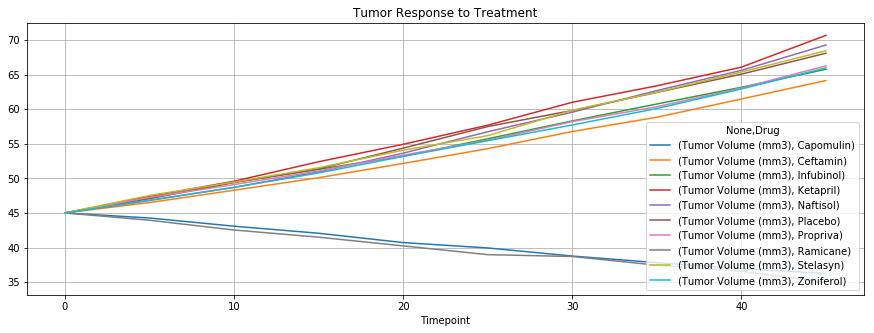

In [20]:
# Generate the Plot (with Error Bars)
#x_lim = 50
#y_lim = 80
#x_axis = np.arange(0,x_lim,10)
#plt.title('Tumor Response to Treatment')
#plt.xlim = (0,x_lim)
#plt.ylim = (30,y_lim)
mc_grp_final_df.plot(grid=True,title="Tumor Response to Treatment",figsize=(15,5))
# Save the Figure
plt.savefig('tumorplot.png')


In [9]:
# Show the Figure
#plt.show()

## Metastatic Response to Treatment

In [10]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 
mc_grpm = mouse_clin_grp_df.drop(columns =['Tumor Volume (mm3)'])
mc_grpm.head()
# Convert to DataFrame

# Preview DataFrame


,Drug,Timepoint,Metastatic Sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.160000
2,Capomulin,10,0.320000
3,Capomulin,15,0.375000
4,Capomulin,20,0.652174


In [11]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 
mc_semm = mouse_clin_data.groupby(['Drug','Timepoint'])['Metastatic Sites'].sem()
# Preview DataFrames
mc_semm_reset = mc_semm.reset_index()
# Convert to DataFrame
mc_semm_df = pd.DataFrame(mc_semm_reset)
# Preview DataFrame
mc_semm_df.head()

,Drug,Timepoint,Metastatic Sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.074833
2,Capomulin,10,0.125433
3,Capomulin,15,0.132048
4,Capomulin,20,0.161621


In [12]:
# Minor Data Munging to Re-Format the Data Frames
mc_grpm_df = mc_grpm.pivot(columns='Drug',index='Timepoint')
# Preview that Reformatting worked
mc_grpm_df.head()

Metastatic Sites                                                    \
Drug             Capomulin  Ceftamin Infubinol  Ketapril  Naftisol   Placebo   
Timepoint                                                                      
0                 0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
5                 0.160000  0.380952  0.280000  0.304348  0.260870  0.375000   
10                0.320000  0.600000  0.666667  0.590909  0.523810  0.833333   
15                0.375000  0.789474  0.904762  0.842105  0.857143  1.250000   
20                0.652174  1.111111  1.050000  1.210526  1.150000  1.526316   

                                                   
Drug       Propriva  Ramicane  Stelasyn Zoniferol  
Timepoint                                          
0          0.000000  0.000000  0.000000  0.000000  
5          0.320000  0.120000  0.240000  0.166667  
10         0.565217  0.250000  0.478261  0.500000  
15         0.764706  0.333333  0.782609  0.809524  
20         1.000000  0.347826  0.952381  1.294118

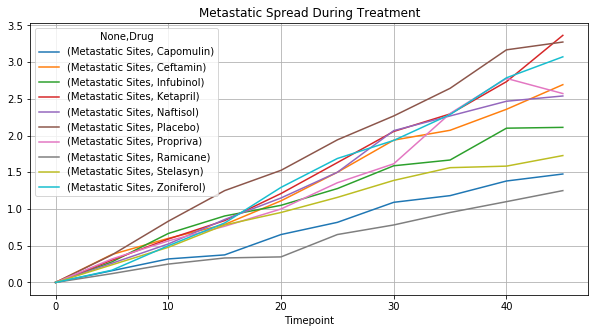

In [18]:
# Generate the Plot (with Error Bars)
mc_grpm_df.plot(grid=True,figsize =(10,5),title='Metastatic Spread During Treatment')
# Save the Figure
plt.savefig('metaplot.png')
# Show the Figure


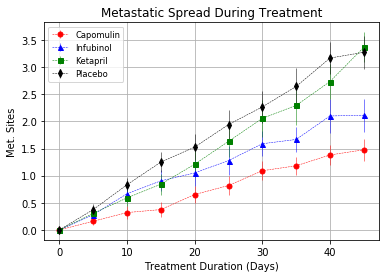

## Survival Rates

In [14]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)
mouse_clin_grp_cnt = mouse_clin_data.groupby(['Drug','Timepoint'])['Mouse ID'].count()
# Convert to DataFrame
mc_grp_cnt = mouse_clin_grp_cnt.reset_index()
mc_grp_cnt_df = pd.DataFrame(mc_grp_cnt)
# Preview DataFrame
mc_grp_cnt_df.head()

,Drug,Timepoint,Mouse ID
0,Capomulin,0,25
1,Capomulin,5,25
2,Capomulin,10,25
3,Capomulin,15,24
4,Capomulin,20,23


,Drug,Timepoint,Mouse Count
0,Capomulin,0,25
1,Capomulin,5,25
2,Capomulin,10,25
3,Capomulin,15,24
4,Capomulin,20,23


In [15]:
# Minor Data Munging to Re-Format the Data Frames
mc_grp_cnt_pivot = mc_grp_cnt_df.pivot(columns='Drug',index='Timepoint')
# Preview the Data Frame
mc_grp_cnt_pivot

Mouse ID                                                        \
Drug      Capomulin Ceftamin Infubinol Ketapril Naftisol Placebo Propriva   
Timepoint                                                                   
0                25       25        25       25       25      25       26   
5                25       21        25       23       23      24       25   
10               25       20        21       22       21      24       23   
15               24       19        21       19       21      20       17   
20               23       18        20       19       20      19       17   
25               22       18        18       19       18      17       14   
30               22       16        17       18       15      15       13   
35               22       14        12       17       15      14       10   
40               21       14        10       15       15      12        9   
45               21       13         9       11       13      11        7   

                                       
Drug      Ramicane Stelasyn Zoniferol  
Timepoint                              
0               25       26        25  
5               25       25        24  
10              24       23        22  
15              24       23        21  
20              23       21        17  
25              23       19        16  
30              23       18        15  
35              21       16        14  
40              20       12        14  
45              20       11        14

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,26,25,26,25
5,25,21,25,23,23,24,25,25,25,24
10,25,20,21,22,21,24,23,24,23,22
15,24,19,21,19,21,20,17,24,23,21
20,23,18,20,19,20,19,17,23,21,17


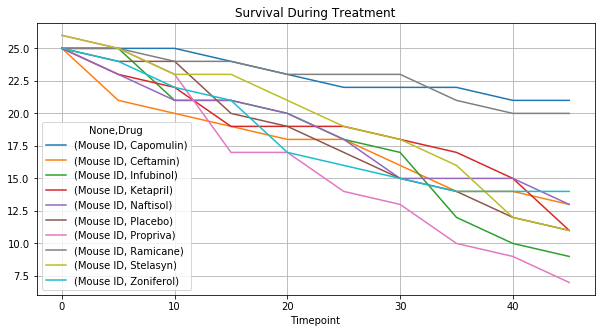

In [31]:
# Generate the Plot (Accounting for percentages)
mc_grp_cnt_pivot.plot(grid=True,figsize=(10,5),title='Survival During Treatment')
# Save the Figure
plt.savefig('mousecnt.png')
# Show the Figure
#plt.show()

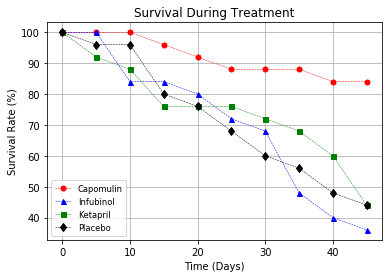

## Summary Bar Graph

In [50]:
# Calculate the percent changes for each drug
mc_grp_pct = (mc_grp_final_df.iloc[-1] - mc_grp_final_df.iloc[0])/mc_grp_final_df.iloc[0]*100
# Display the data to confirm
mc_grp_pct

                    Drug     
Tumor Volume (mm3)  Capomulin   -19.475303
                    Ceftamin     42.516492
                    Infubinol    46.123472
                    Ketapril     57.028795
                    Naftisol     53.923347
                    Placebo      51.297960
                    Propriva     47.241175
                    Ramicane    -22.320900
                    Stelasyn     52.085134
                    Zoniferol    46.579751
dtype: float64

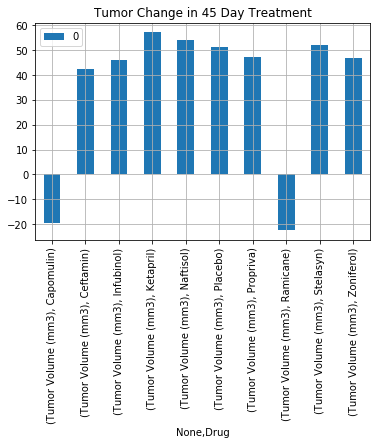

In [58]:
# Store all Relevant Percent Changes into a Tuple
mc_grp_pct_df = pd.DataFrame(mc_grp_pct)
mc_grp_pct_df.head()

# Splice the data between passing and failing drugs


# Orient widths. Add labels, tick marks, etc. 


# Use functions to label the percentages of changes


# Call functions to implement the function calls
mc_grp_pct_df.plot(grid=True,kind='bar',title="Tumor Change in 45 Day Treatment")

# Save the Figure
plt.savefig('summpct.png')

# Show the Figure
#fig.show()

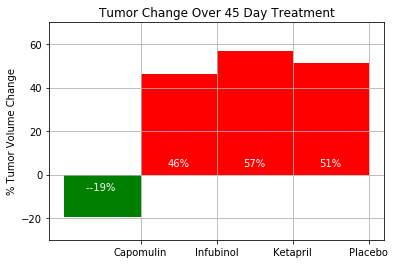